Population size: 3000
Infected at t=0: 7
R0= 1.95
R_eff=1 at t= 31 d
Deceased= 587.6239673013062


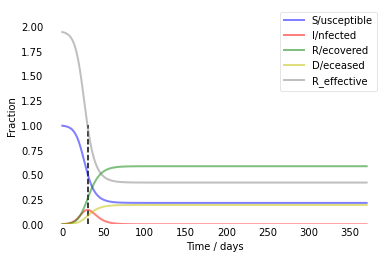

In [8]:
# Basic SIRD model (adapted)
###### (a)
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# Population size
N = 3000

# Initial conditions: 1 Infected, no Recovered individuals
I0, R0, D0 = 7, 0, 0 #case zero

#N = S0 + I0 + R0 + D0
S0 = N - I0 - R0 - D0 #normalization

# Contact rate, beta; recovery rate, gamma; mortality rate mu
beta, gamma, mu = 0.39, 0.15, 0.05

# Basic reproduction number R0 (R nought), average number of individuals that can get infected which will not change over time.
R_nought = beta / (gamma + mu)

# R_effective = R_nought * S/N

print("Population size:", N)
print("Infected at t=0:", I0)
print ("R0=",R_nought)

# A grid of time points (in days)
t = np.linspace(0, 370, 370)

# SIRD model (coupled nonlinear system of ODEs)
def deriv(y, t, N, beta, gamma,mu):
    S, I, R, D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

#1/gamma average time to recover

# Initial conditions vector
y0 = S0, I0, R0, D0

# Integrate the SIRD equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, mu))
S, I, R, D = ret.T # return vector

#find R_effective = 1 time
t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time]/N < 1: 
        t_1 = time
        break
print("R_eff=1 at t=", t_1, "d")
print("Deceased=", D[-1])

# Plot the data on four separate curves for S(t), I(t), R(t) and D(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
ax.plot(t, D/N, 'y', alpha=0.5, lw=2, label='D/eceased')
ax.plot(t, R_nought*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
ax.set_xlabel('Time / days')
ax.set_ylabel('Fraction')
ax.set_ylim(0,2.2)
ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [14]:
# Basic SIRD model (adapted)
# (b)
# Population size
N = 3000

# Initial conditions: 1 Infected, no Recovered individuals
I0, R0, D0 = 7, 0, 0 #case zero

S0 = N - I0 - R0 - D0 #normalization

# SIRD model (coupled nonlinear system of ODEs)
def deriv(y, t, N, beta, gamma,mu):
    S, I, R, D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

# Contact rate, beta; recovery rate, gamma; mortality rate mu
gamma = 0.15
R_nought = [3.0,4.0]
mu = [0.004, 0.04]

# at 365 day
t = np.linspace(0, 365, 365)

# Initial conditions vector
y0 = S0, I0, R0, D0
#R_effctive = np.zeros(len(t))
R_effctive = []
# Integrate the SIRD equations over the time grid, t.
for  basic_repr_nr in R_nought:
    for mortality_rate in mu:
        beta = basic_repr_nr*(gamma + mortality_rate)
        print("beta=", beta)
        ret = odeint(deriv, y0, t, args=(N, beta, gamma, mortality_rate))
        S, I, R, D = ret.T # return vector
        print("Deceased=", D[-1])
        R_effctive.append(basic_repr_nr*S/N)

beta= 0.46199999999999997
Deceased= 73.29730633124336
beta= 0.5700000000000001
Deceased= 594.0939576633357
beta= 0.616
Deceased= 76.38100022285931
beta= 0.76
Deceased= 619.0881070441977


In [4]:
# Basic SIRD model (adapted)
# (c)
# Population size
N = 3000

# Initial conditions: 1 Infected, no Recovered individuals
I0, R0, D0 = 7, 0, 0 #case zero

S0 = N - I0 - R0 - D0 #normalization

# SIRD model (coupled nonlinear system of ODEs)
def deriv(y, t, N, beta, gamma,mu):
    S, I, R, D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

# Contact rate, beta; recovery rate, gamma; mortality rate mu
R_nought = 4.0
mu = 0.01
beta = [.1,.7]
# at 365 day
t = np.linspace(0, 365, 365)

# Initial conditions vector
y0 = S0, I0, R0, D0

# Integrate the SIRD equations over the time grid, t.
for  infection_rate in beta:
        gamma = (infection_rate/R_nought) - mu
        print("gamma=", gamma)
        ret = odeint(deriv, y0, t, args=(N, infection_rate, gamma, mu))
        S, I, R, D = ret.T # return vector
        print("Deceased=", D[-1])

gamma= 0.015000000000000001
Deceased= 1174.2792132937568
gamma= 0.16499999999999998
Deceased= 168.0382004889669


In [ ]:
#

R_effctive = R_nought*S/N